In [77]:
#import library
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import os

In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime

In [80]:
# !cd $PUIDATA;unzip ACS_17_5YR_S0101.zip

In [81]:
age_data = pd.read_csv(os.getenv("PUIDATA") + "/ACS_17_5YR_S0101_with_ann.csv")
age_data.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,3,4,7,8,11,12,15,16,19,20,23,24,27,28,31,32,35,36,39,40,43,44,47,48,51,52,55,56,59,60,63,64,67,68,71,72,75,76,79,80,83,84,87,88,91,92,95,96,99,100,103,104,107,108,111,112,115,116,119,120,123,124,127,128,131,132,135,136,139,140,143,144,147,148,151,152,155,156,159,160,163,164,167,168,171,172,175,176,179,180,183,184,187,188,191,192,195,196,199,200,203,204,207,208,211,212,215,216,219,220,223,224,227,228,231,232,235,236,239,240,243,244,247,248,251,252,255,256,259,260,263,264,267,268,271,272,275,276,279,280,283,284,287,288,291,292,295,296,299,300,303,304,307,308,311,312,315,316,319,320,323,324,327,328,331,332,335,336,339,340,343,344,347,348,351,352,355,356,359,360,363,364,367,368,371,372) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC01,HC01_MOE_VC01,HC02_EST_VC01,HC02_MOE_VC01,HC03_EST_VC01,HC03_MOE_VC01,HC04_EST_VC01,HC04_MOE_VC01,HC05_EST_VC01,HC05_MOE_VC01,HC06_EST_VC01,HC06_MOE_VC01,HC01_EST_VC03,HC01_MOE_VC03,HC02_EST_VC03,HC02_MOE_VC03,HC03_EST_VC03,HC03_MOE_VC03,HC04_EST_VC03,HC04_MOE_VC03,HC05_EST_VC03,HC05_MOE_VC03,HC06_EST_VC03,HC06_MOE_VC03,HC01_EST_VC04,HC01_MOE_VC04,HC02_EST_VC04,HC02_MOE_VC04,HC03_EST_VC04,HC03_MOE_VC04,HC04_EST_VC04,HC04_MOE_VC04,HC05_EST_VC04,HC05_MOE_VC04,HC06_EST_VC04,HC06_MOE_VC04,HC01_EST_VC05,HC01_MOE_VC05,HC02_EST_VC05,HC02_MOE_VC05,HC03_EST_VC05,HC03_MOE_VC05,HC04_EST_VC05,HC04_MOE_VC05,HC05_EST_VC05,HC05_MOE_VC05,HC06_EST_VC05,HC06_MOE_VC05,HC01_EST_VC06,HC01_MOE_VC06,HC02_EST_VC06,HC02_MOE_VC06,HC03_EST_VC06,HC03_MOE_VC06,HC04_EST_VC06,HC04_MOE_VC06,HC05_EST_VC06,HC05_MOE_VC06,HC06_EST_VC06,HC06_MOE_VC06,HC01_EST_VC07,HC01_MOE_VC07,HC02_EST_VC07,...,HC04_EST_VC38,HC04_MOE_VC38,HC05_EST_VC38,HC05_MOE_VC38,HC06_EST_VC38,HC06_MOE_VC38,HC01_EST_VC39,HC01_MOE_VC39,HC02_EST_VC39,HC02_MOE_VC39,HC03_EST_VC39,HC03_MOE_VC39,HC04_EST_VC39,HC04_MOE_VC39,HC05_EST_VC39,HC05_MOE_VC39,HC06_EST_VC39,HC06_MOE_VC39,HC01_EST_VC40,HC01_MOE_VC40,HC02_EST_VC40,HC02_MOE_VC40,HC03_EST_VC40,HC03_MOE_VC40,HC04_EST_VC40,HC04_MOE_VC40,HC05_EST_VC40,HC05_MOE_VC40,HC06_EST_VC40,HC06_MOE_VC40,HC01_EST_VC41,HC01_MOE_VC41,HC02_EST_VC41,HC02_MOE_VC41,HC03_EST_VC41,HC03_MOE_VC41,HC04_EST_VC41,HC04_MOE_VC41,HC05_EST_VC41,HC05_MOE_VC41,HC06_EST_VC41,HC06_MOE_VC41,HC01_EST_VC44,HC01_MOE_VC44,HC02_EST_VC44,HC02_MOE_VC44,HC03_EST_VC44,HC03_MOE_VC44,HC04_EST_VC44,HC04_MOE_VC44,HC05_EST_VC44,HC05_MOE_VC44,HC06_EST_VC44,HC06_MOE_VC44,HC01_EST_VC45,HC01_MOE_VC45,HC02_EST_VC45,HC02_MOE_VC45,HC03_EST_VC45,HC03_MOE_VC45,HC04_EST_VC45,HC04_MOE_VC45,HC05_EST_VC45,HC05_MOE_VC45,HC06_EST_VC45,HC06_MOE_VC45
0,Id,Id2,Geography,Total; Estimate; Total population,Total; Margin of Error; Total population,Percent; Estimate; Total population,Percent; Margin of Error; Total population,Male; Estimate; Total population,Male; Margin of Error; Total population,Percent Male; Estimate; Total population,Percent Male; Margin of Error; Total population,Female; Estimate; Total population,Female; Margin of Error; Total population,Percent Female; Estimate; Total population,Percent Female; Margin of Error; Total population,Total; Estimate; AGE - Under 5 years,Total; Margin of Error; AGE - Under 5 years,Percent; Estimate; AGE - Under 5 years,Percent; Margin of Error; AGE - Under 5 years,Male; Estimate; AGE - Under 5 years,Male; Margin of Error; AGE - Under 5 years,Percent Male; Estimate; AGE - Under 5 years,Percent Male; Margin of Error; AGE - Under 5 y...,Female; Estimate; AGE - Under 5 years,Female; Margin of Error; AGE - Under 5 years,Percent Female; Estimate; AGE - Under 5 years,Percent Female; Margin of Error; AGE - Under 5...,Total; Estimate; AGE - 5 to 9 years,Total; Margin of Error; AGE - 5 to 9 years,Percent; Estimate; AGE - 5 to 9 years,Percent; Margin of Error; AGE - 5 to 9 years,Male; Estimate; AGE - 5 to 9 years,Male; Margin of Error; AGE - 5 to 9 years,Percent Male; Estimate; AGE - 5 to 9 years,Percent Male; Margin of Error; AGE - 5 to 9 years,Female; Estimate; AGE - 5 to 9 years,Female; Margin of Error; AGE - 5 to 9 years,Percent Female; Estimate; AGE - 5 to 9 years,Percent Female; Margin of Error; AGE - 5 to 9 ...,Total; Estimate; AGE - 10 to 14 years,Total; Margin of Error; AGE - 10 to 14 years,Percent; Estimate; AGE - 10 to 14 years,Percent; Margin of Error; AGE - 10 to 14 years,Male; Estimate; AGE - 10 to 14 years,Male; Margin of Error; AGE - 10 to 14 years,Percent Male; Estimate; AGE - 10 to 14 years,Percent Male; Margin of Error; AGE - 10 to 14 ...,Female; Estimate; AGE - 10 to 14 years,Female; Margin of Error; AGE - 10 to 14 years,Percent Female; Estimate; AGE - 10 to 14 years,Percent Female; Margin of Error; AGE - 10 to 1...,Total; Estimate; AGE - 15 to 19 years,Total; Margin of Error; AGE - 15 to 19 years,Percent; Estim

In [82]:
age_data.shape

(4920, 459)

In [83]:
# import zipfile
# with zipfile.ZipFile("ACS_17_5YR_S1901_income.zip","r") as zip_ref:
#     zip_ref.extractall("~/capstone")

In [84]:
# income = pd.read_csv("ACS_17_5YR_S1901_with_ann.csv")
# #income = ACS_17_5YR_S1901_with_ann.csv

In [85]:
age_data.head()

,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC01,HC01_MOE_VC01,HC02_EST_VC01,HC02_MOE_VC01,HC03_EST_VC01,HC03_MOE_VC01,HC04_EST_VC01,HC04_MOE_VC01,HC05_EST_VC01,HC05_MOE_VC01,HC06_EST_VC01,HC06_MOE_VC01,HC01_EST_VC03,HC01_MOE_VC03,HC02_EST_VC03,HC02_MOE_VC03,HC03_EST_VC03,HC03_MOE_VC03,HC04_EST_VC03,HC04_MOE_VC03,HC05_EST_VC03,HC05_MOE_VC03,HC06_EST_VC03,HC06_MOE_VC03,HC01_EST_VC04,HC01_MOE_VC04,HC02_EST_VC04,HC02_MOE_VC04,HC03_EST_VC04,HC03_MOE_VC04,HC04_EST_VC04,HC04_MOE_VC04,HC05_EST_VC04,HC05_MOE_VC04,HC06_EST_VC04,HC06_MOE_VC04,HC01_EST_VC05,HC01_MOE_VC05,HC02_EST_VC05,HC02_MOE_VC05,HC03_EST_VC05,HC03_MOE_VC05,HC04_EST_VC05,HC04_MOE_VC05,HC05_EST_VC05,HC05_MOE_VC05,HC06_EST_VC05,HC06_MOE_VC05,HC01_EST_VC06,HC01_MOE_VC06,HC02_EST_VC06,HC02_MOE_VC06,HC03_EST_VC06,HC03_MOE_VC06,HC04_EST_VC06,HC04_MOE_VC06,HC05_EST_VC06,HC05_MOE_VC06,HC06_EST_VC06,HC06_MOE_VC06,HC01_EST_VC07,HC01_MOE_VC07,HC02_EST_VC07,...,HC04_EST_VC38,HC04_MOE_VC38,HC05_EST_VC38,HC05_MOE_VC38,HC06_EST_VC38,HC06_MOE_VC38,HC01_EST_VC39,HC01_MOE_VC39,HC02_EST_VC39,HC02_MOE_VC39,HC03_EST_VC39,HC03_MOE_VC39,HC04_EST_VC39,HC04_MOE_VC39,HC05_EST_VC39,HC05_MOE_VC39,HC06_EST_VC39,HC06_MOE_VC39,HC01_EST_VC40,HC01_MOE_VC40,HC02_EST_VC40,HC02_MOE_VC40,HC03_EST_VC40,HC03_MOE_VC40,HC04_EST_VC40,HC04_MOE_VC40,HC05_EST_VC40,HC05_MOE_VC40,HC06_EST_VC40,HC06_MOE_VC40,HC01_EST_VC41,HC01_MOE_VC41,HC02_EST_VC41,HC02_MOE_VC41,HC03_EST_VC41,HC03_MOE_VC41,HC04_EST_VC41,HC04_MOE_VC41,HC05_EST_VC41,HC05_MOE_VC41,HC06_EST_VC41,HC06_MOE_VC41,HC01_EST_VC44,HC01_MOE_VC44,HC02_EST_VC44,HC02_MOE_VC44,HC03_EST_VC44,HC03_MOE_VC44,HC04_EST_VC44,HC04_MOE_VC44,HC05_EST_VC44,HC05_MOE_VC44,HC06_EST_VC44,HC06_MOE_VC44,HC01_EST_VC45,HC01_MOE_VC45,HC02_EST_VC45,HC02_MOE_VC45,HC03_EST_VC45,HC03_MOE_VC45,HC04_EST_VC45,HC04_MOE_VC45,HC05_EST_VC45,HC05_MOE_VC45,HC06_EST_VC45,HC06_MOE_VC45
0,Id,Id2,Geography,Total; Estimate; Total population,Total; Margin of Error; Total population,Percent; Estimate; Total population,Percent; Margin of Error; Total population,Male; Estimate; Total population,Male; Margin of Error; Total population,Percent Male; Estimate; Total population,Percent Male; Margin of Error; Total population,Female; Estimate; Total population,Female; Margin of Error; Total population,Percent Female; Estimate; Total population,Percent Female; Margin of Error; Total population,Total; Estimate; AGE - Under 5 years,Total; Margin of Error; AGE - Under 5 years,Percent; Estimate; AGE - Under 5 years,Percent; Margin of Error; AGE - Under 5 years,Male; Estimate; AGE - Under 5 years,Male; Margin of Error; AGE - Under 5 years,Percent Male; Estimate; AGE - Under 5 years,Percent Male; Margin of Error; AGE - Under 5 y...,Female; Estimate; AGE - Under 5 years,Female; Margin of Error; AGE - Under 5 years,Percent Female; Estimate; AGE - Under 5 years,Percent Female; Margin of Error; AGE - Under 5...,Total; Estimate; AGE - 5 to 9 years,Total; Margin of Error; AGE - 5 to 9 years,Percent; Estimate; AGE - 5 to 9 years,Percent; Margin of Error; AGE - 5 to 9 years,Male; Estimate; AGE - 5 to 9 years,Male; Margin of Error; AGE - 5 to 9 years,Percent Male; Estimate; AGE - 5 to 9 years,Percent Male; Margin of Error; AGE - 5 to 9 years,Female; Estimate; AGE - 5 to 9 years,Female; Margin of Error; AGE - 5 to 9 years,Percent Female; Estimate; AGE - 5 to 9 years,Percent Female; Margin of Error; AGE - 5 to 9 ...,Total; Estimate; AGE - 10 to 14 years,Total; Margin of Error; AGE - 10 to 14 years,Percent; Estimate; AGE - 10 to 14 years,Percent; Margin of Error; AGE - 10 to 14 years,Male; Estimate; AGE - 10 to 14 years,Male; Margin of Error; AGE - 10 to 14 years,Percent Male; Estimate; AGE - 10 to 14 years,Percent Male; Margin of Error; AGE - 10 to 14 ...,Female; Estimate; AGE - 10 to 14 years,Female; Margin of Error; AGE - 10 to 14 years,Percent Female; Estimate; AGE - 10 to 14 years,Percent Female; Margin of Error; AGE - 10 to 1...,Total; Estimate; AGE - 15 to 19 years,Total; Margin of Error; AGE - 15 to 19 years,Percent; Estim

In [86]:
header = age_data.iloc[0]

In [87]:
age_data = age_data[1:]

In [88]:
age_data = age_data.rename(columns = header)

In [89]:
pd.set_option('max_columns',132)
age_data.head(10)

,Id,Id2,Geography,Total; Estimate; Total population,Total; Margin of Error; Total population,Percent; Estimate; Total population,Percent; Margin of Error; Total population,Male; Estimate; Total population,Male; Margin of Error; Total population,Percent Male; Estimate; Total population,Percent Male; Margin of Error; Total population,Female; Estimate; Total population,Female; Margin of Error; Total population,Percent Female; Estimate; Total population,Percent Female; Margin of Error; Total population,Total; Estimate; AGE - Under 5 years,Total; Margin of Error; AGE - Under 5 years,Percent; Estimate; AGE - Under 5 years,Percent; Margin of Error; AGE - Under 5 years,Male; Estimate; AGE - Under 5 years,Male; Margin of Error; AGE - Under 5 years,Percent Male; Estimate; AGE - Under 5 years,Percent Male; Margin of Error; AGE - Under 5 years,Female; Estimate; AGE - Under 5 years,Female; Margin of Error; AGE - Under 5 years,Percent Female; Estimate; AGE - Under 5 years,Percent Female; Margin of Error; AGE - Under 5 years,Total; Estimate; AGE - 5 to 9 years,Total; Margin of Error; AGE - 5 to 9 years,Percent; Estimate; AGE - 5 to 9 years,Percent; Margin of Error; AGE - 5 to 9 years,Male; Estimate; AGE - 5 to 9 years,Male; Margin of Error; AGE - 5 to 9 years,Percent Male; Estimate; AGE - 5 to 9 years,Percent Male; Margin of Error; AGE - 5 to 9 years,Female; Estimate; AGE - 5 to 9 years,Female; Margin of Error; AGE - 5 to 9 years,Percent Female; Estimate; AGE - 5 to 9 years,Percent Female; Margin of Error; AGE - 5 to 9 years,Total; Estimate; AGE - 10 to 14 years,Total; Margin of Error; AGE - 10 to 14 years,Percent; Estimate; AGE - 10 to 14 years,Percent; Margin of Error; AGE - 10 to 14 years,Male; Estimate; AGE - 10 to 14 years,Male; Margin of Error; AGE - 10 to 14 years,Percent Male; Estimate; AGE - 10 to 14 years,Percent Male; Margin of Error; AGE - 10 to 14 years,Female; Estimate; AGE - 10 to 14 years,Female; Margin of Error; AGE - 10 to 14 years,Percent Female; Estimate; AGE - 10 to 14 years,Percent Female; Margin of Error; AGE - 10 to 14 years,Total; Estimate; AGE - 15 to 19 years,Total; Margin of Error; AGE - 15 to 19 years,Percent; Estimate; AGE - 15 to 19 years,Percent; Margin of Error; AGE - 15 to 19 years,Male; Estimate; AGE - 15 to 19 years,Male; Margin of Error; AGE - 15 to 19 years,Percent Male; Estimate; AGE - 15 to 19 years,Percent Male; Margin of Error; AGE - 15 to 19 years,Female; Estimate; AGE - 15 to 19 years,Female; Margin of Error; AGE - 15 to 19 years,Percent Female; Estimate; AGE - 15 to 19 years,Percent Female; Margin of Error; AGE - 15 to 19 years,Total; Estimate; AGE - 20 to 24 years,Total; Margin of Error; AGE - 20 to 24 years,Percent; Estimate; AGE - 20 to 24 years,...,Percent Male; Estimate; SUMMARY INDICATORS - Sex ratio (males per 100 females),Percent Male; Margin of Error; SUMMARY INDICATORS - Sex ratio (males per 100 females),Female; Estimate; SUMMARY INDICATORS - Sex ratio (males per 100 females),Female; Margin of Error; SUMMARY INDICATORS - Sex ratio (males per 100 females),Percent Female; Estimate; SUMMARY INDICATORS - Sex ratio (males per 100 females),Percent Female; Margin of Error; SUMMARY INDICATORS - Sex ratio (males per 100 females),Total; Estimate; SUMMARY INDICATORS - Age dependency ratio,Total; Margin of Error; SUMMARY INDICATORS - Age dependency ratio,Percent; Estimate; SUMMARY INDICATORS - Age dependency ratio,Percent; Margin of Error; SUMMARY INDICATORS - Age dependency ratio,Male; Estimate; SUMMARY INDICATORS - Age dependency ratio,Male; Margin of Error; SUMMARY INDICATORS - Age dependency ratio,Percent Male; Estimate; SUMMARY INDICATORS - Age dependency ratio,Percent Male; Margin of Error; SUMMARY INDICATORS - Age dependency ratio,Female; Estimate; SUMMARY INDICATORS - Age dependency ratio,Female; Margin of Error; SUMMARY INDICATORS - Age dependency ratio,Percent Female; Estimate; SUMMARY INDICATORS - Age dependency ratio,Percent Female; Margin of Error; SUMMARY INDICATORS - Age dependency ra

In [90]:
# for i in income.values:
#     income_1 = [x for x in income[1:] if "Estimate" and "Households" in x]

In [91]:
# def filtering(x):
#     if "Estimate" and "Households" in x:
#         return str(x)

In [92]:
#for col in income[0:]:
    #col_combined = list(income[col].map(filtering))
    #le = LabelEncoder().fit(col_combined)
    #income[col] = income[col].map(filtering)
    #df_test[col] = le.transform(df_test[col].map(mapNan))

In [93]:
 req = []
for col in age_data.columns.values:
    if "Male" not in col and "Female" not in col and "Margin" not in col and "Percent" in col and "INDICATORS" not in col:
        req.append(col)

In [94]:
 req.append('Id2')

In [95]:
age_data = age_data[req]
age_data

,Percent; Estimate; Total population,Percent; Estimate; AGE - Under 5 years,Percent; Estimate; AGE - 5 to 9 years,Percent; Estimate; AGE - 10 to 14 years,Percent; Estimate; AGE - 15 to 19 years,Percent; Estimate; AGE - 20 to 24 years,Percent; Estimate; AGE - 25 to 29 years,Percent; Estimate; AGE - 30 to 34 years,Percent; Estimate; AGE - 35 to 39 years,Percent; Estimate; AGE - 40 to 44 years,Percent; Estimate; AGE - 45 to 49 years,Percent; Estimate; AGE - 50 to 54 years,Percent; Estimate; AGE - 55 to 59 years,Percent; Estimate; AGE - 60 to 64 years,Percent; Estimate; AGE - 65 to 69 years,Percent; Estimate; AGE - 70 to 74 years,Percent; Estimate; AGE - 75 to 79 years,Percent; Estimate; AGE - 80 to 84 years,Percent; Estimate; AGE - 85 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 5 to 14 years,Percent; Estimate; SELECTED AGE CATEGORIES - 15 to 17 years,Percent; Estimate; SELECTED AGE CATEGORIES - Under 18 years,Percent; Estimate; SELECTED AGE CATEGORIES - 18 to 24 years,Percent; Estimate; SELECTED AGE CATEGORIES - 15 to 44 years,Percent; Estimate; SELECTED AGE CATEGORIES - 16 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 18 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 21 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 60 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 62 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 65 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 75 years and over,Percent; Estimate; PERCENT ALLOCATED - Sex,Percent; Estimate; PERCENT ALLOCATED - Age,Id2
1,(X),5.9,5.8,5.9,6.3,7.1,7.6,7.0,6.3,6.2,6.7,7.1,6.8,6.0,4.9,3.6,2.6,1.9,2.2,11.6,3.7,21.2,9.8,40.6,81.2,78.8,74.7,21.2,18.6,15.2,6.7,0.1,2.0,36
2,(X),11.0,6.0,5.8,6.8,4.5,5.1,8.0,5.4,4.8,6.8,7.7,7.5,8.1,6.5,2.5,1.4,1.4,0.7,11.8,3.6,26.4,7.7,34.6,76.0,73.6,70.1,20.7,18.2,12.5,3.5,0.0,7.2,36001000100
3,(X),5.5,7.5,6.9,5.5,12.9,8.4,8.2,2.5,9.5,5.7,12.0,6.1,3.2,2.3,1.5,0.4,1.2,0.9,14.4,4.6,24.5,13.8,46.9,79.5,75.5,70.8,9.4,7.7,6.2,2.5,0.0,8.8,36001000200
4,(X),6.6,4.4,9.3,3.1,12.5,8.0,6.6,2.8,3.7,5.0,5.4,9.9,3.8,4.2,5.4,3.3,1.8,4.0,13.8,3.1,23.5,12.5,36.7,79.5,76.5,72.3,22.5,20.8,18.7,9.2,0.0,2.8,36001000300
5,(X),4.5,1.1,1.4,1.2,0.0,7.1,8.3,1.3,5.9,3.1,7.8,4.9,4.2,6.5,3.5,4.4,8.7,25.9,2.4,1.2,8.2,0.0,23.9,92.4,91.8,91.8,53.4,51.3,49.1,39.1,0.0,1.0,36001000401
6,(X),6.6,1.8,3.5,7.0,14.5,7.1,10.5,5.6,4.5,7.1,7.2,4.9,3.9,4.5,5.5,1.7,1.7,2.4,5.3,1.1,12.9,20.4,49.1,88.1,87.1,80.6,19.8,17.3,15.8,5.9,0.3,3.8,36001000403
7,(X),0.0,0.0,0.0,59.5,39.5,0.0,0.5,0.2,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.1,0.1,0.2,0.0,1.1,1.1,97.8,99.6,100.0,98.9,20.1,0.3,0.3,0.3,0.3,0.0,0.1,36001000404
8,(X),6.8,4.4,8.4,4.9,9.4,8.1,10.6,7.5,6.6,4.8,3.3,8.7,7.0,3.1,2.4,2.1,0.6,1.3,12.8,3.4,22.9,10.9,47.1,80.0,77.1,75.0,16.6,15.2,9.6,4.1,0.0,8.3,36001000501
9,(X),1.0,2.3,1.6,31.4,33.3,6.2,5.9,2.5,1.9,2.7,3.1,2.9,1.6,0.8,1.5,0.4,0.4,0.7,3.9,3.4,8.3,61.3,81.1,93.8,91.7,51.1,5.3,4.6,3.7,1.5,0.2,1.1,36001000502
10,(X),6.1,11.1,6.7,3.3,24.1,11.3,6.6,5.4,7.5,1.9,4.6,4.6,3.4,1.5,1.2,0.2,0.3,0.0,17.8,1.9,25.8,25.5,58.3,75.8,74.2,68.1,6.6,4.5,3.2,0.5,0.0,5.3,36001000600


In [96]:
tracts = pd.read_csv("https://data.cityofnewyork.us/api/views/i69b-3rdj/rows.csv?accessType=DOWNLOAD")
#tracts = pd.read_csv("for col in merged.columns":
 #   col=pd.to_numeric((col),errors='coerce')https://data.cityofnewyork.us/api/views/i69b-3rdj/rows.csv?accessType=DOWNLOAD")

In [97]:
tracts.head()

,BoroName,the_geom,BoroCode,CTLabel,CT2010,BoroCT2010,CDEligibil,NTACode,NTAName,PUMA,Shape_Leng,Shape_Area
0,Staten Island,MULTIPOLYGON (((-74.07920577013245 40.64343078...,5,9.0,900,5000900,E,SI22,West New Brighton-New Brighton-St. George,3903,7729.016794,2.497010e+06
1,Manhattan,MULTIPOLYGON (((-73.96432543478758 40.75638153...,1,98.0,9800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.199811,1.906016e+06
2,Manhattan,MULTIPOLYGON (((-73.96802436915851 40.75957814...,1,100.0,10000,1010000,I,MN19,Turtle Bay-East Midtown,3808,5692.168737,1.860938e+06
3,Manhattan,MULTIPOLYGON (((-73.97124277307127 40.76093641...,1,102.0,10200,1010200,I,MN17,Midtown-Midtown South,3807,5687.802439,1.860993e+06
4,Manhattan,MULTIPOLYGON (((-73.97445730550224 40.76229308...,1,104.0,10400,1010400,I,MN17,Midtown-Midtown South,3807,5693.036367,1.864600e+06


In [98]:
tracts

,BoroName,the_geom,BoroCode,CTLabel,CT2010,BoroCT2010,CDEligibil,NTACode,NTAName,PUMA,Shape_Leng,Shape_Area
0,Staten Island,MULTIPOLYGON (((-74.07920577013245 40.64343078...,5,9.00,900,5000900,E,SI22,West New Brighton-New Brighton-St. George,3903,7729.016794,2.497010e+06
1,Manhattan,MULTIPOLYGON (((-73.96432543478758 40.75638153...,1,98.00,9800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.199811,1.906016e+06
2,Manhattan,MULTIPOLYGON (((-73.96802436915851 40.75957814...,1,100.00,10000,1010000,I,MN19,Turtle Bay-East Midtown,3808,5692.168737,1.860938e+06
3,Manhattan,MULTIPOLYGON (((-73.97124277307127 40.76093641...,1,102.00,10200,1010200,I,MN17,Midtown-Midtown South,3807,5687.802439,1.860993e+06
4,Manhattan,MULTIPOLYGON (((-73.97445730550224 40.76229308...,1,104.00,10400,1010400,I,MN17,Midtown-Midtown South,3807,5693.036367,1.864600e+06
5,Manhattan,MULTIPOLYGON (((-73.98411754823195 40.75484205...,1,113.00,11300,1011300,I,MN17,Midtown-Midtown South,3807,5699.860641,1.890907e+06
6,Manhattan,MULTIPOLYGON (((-73.96475544914023 40.76405707...,1,114.02,11402,1011402,I,MN40,Upper East Side-Carnegie Hill,3805,4125.256029,1.063547e+06
7,Manhattan,MULTIPOLYGON (((-73.96147581181627 40.77432401...,1,130.00,13000,1013000,I,MN40,Upper East Side-Carnegie Hill,3805,5807.972956,1.918145e+06
8,Manhattan,MULTIPOLYGON (((-73.95494520074165 40.77750394...,1,140.00,14000,1014000,I,MN40,Upper East Side-Carnegie Hill,3805,5820.815640,1.925984e+06
9,Manhattan,MULTIPOLYGON (((-73.95398370221397 40.77882211...,1,148.01,14801,1014801,I,MN40,Upper East Side-Carnegie Hill,3805,3135.951423,5.592162e+05


In [99]:
tracts.shape

(2166, 12)

In [100]:
#tracts.unique

In [101]:
print(tracts.dtypes)

BoroName       object
the_geom       object
BoroCode        int64
CTLabel       float64
CT2010          int64
BoroCT2010      int64
CDEligibil     object
NTACode        object
NTAName        object
PUMA            int64
Shape_Leng    float64
Shape_Area    float64
dtype: object


In [102]:
tracts[['BoroName']]=tracts[['BoroName']].astype(str)

In [103]:
tracts.dtypes

BoroName       object
the_geom       object
BoroCode        int64
CTLabel       float64
CT2010          int64
BoroCT2010      int64
CDEligibil     object
NTACode        object
NTAName        object
PUMA            int64
Shape_Leng    float64
Shape_Area    float64
dtype: object

In [104]:
tracts = tracts[tracts.BoroName == "Manhattan"]

In [105]:
tracts.head()

,BoroName,the_geom,BoroCode,CTLabel,CT2010,BoroCT2010,CDEligibil,NTACode,NTAName,PUMA,Shape_Leng,Shape_Area
1,Manhattan,MULTIPOLYGON (((-73.96432543478758 40.75638153...,1,98.0,9800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.199811,1.906016e+06
2,Manhattan,MULTIPOLYGON (((-73.96802436915851 40.75957814...,1,100.0,10000,1010000,I,MN19,Turtle Bay-East Midtown,3808,5692.168737,1.860938e+06
3,Manhattan,MULTIPOLYGON (((-73.97124277307127 40.76093641...,1,102.0,10200,1010200,I,MN17,Midtown-Midtown South,3807,5687.802439,1.860993e+06
4,Manhattan,MULTIPOLYGON (((-73.97445730550224 40.76229308...,1,104.0,10400,1010400,I,MN17,Midtown-Midtown South,3807,5693.036367,1.864600e+06
5,Manhattan,MULTIPOLYGON (((-73.98411754823195 40.75484205...,1,113.0,11300,1011300,I,MN17,Midtown-Midtown South,3807,5699.860641,1.890907e+06


In [106]:
tracts.drop(['BoroName', 'CDEligibil','NTAName','BoroCode'],axis=1)

,the_geom,CTLabel,CT2010,BoroCT2010,NTACode,PUMA,Shape_Leng,Shape_Area
1,MULTIPOLYGON (((-73.96432543478758 40.75638153...,98.00,9800,1009800,MN19,3808,5534.199811,1.906016e+06
2,MULTIPOLYGON (((-73.96802436915851 40.75957814...,100.00,10000,1010000,MN19,3808,5692.168737,1.860938e+06
3,MULTIPOLYGON (((-73.97124277307127 40.76093641...,102.00,10200,1010200,MN17,3807,5687.802439,1.860993e+06
4,MULTIPOLYGON (((-73.97445730550224 40.76229308...,104.00,10400,1010400,MN17,3807,5693.036367,1.864600e+06
5,MULTIPOLYGON (((-73.98411754823195 40.75484205...,113.00,11300,1011300,MN17,3807,5699.860641,1.890907e+06
6,MULTIPOLYGON (((-73.96475544914023 40.76405707...,114.02,11402,1011402,MN40,3805,4125.256029,1.063547e+06
7,MULTIPOLYGON (((-73.96147581181627 40.77432401...,130.00,13000,1013000,MN40,3805,5807.972956,1.918145e+06
8,MULTIPOLYGON (((-73.95494520074165 40.77750394...,140.00,14000,1014000,MN40,3805,5820.815640,1.925984e+06
9,MULTIPOLYGON (((-73.95398370221397 40.77882211...,148.01,14801,1014801,MN40,3805,3135.951423,5.592162e+05
10,MULTIPOLYGON (((-73.94181428695792 40.80123649...,184.00,18400,1018400,MN34,3804,5771.874098,1.903568e+06


In [107]:
age_data.drop(['Percent; Estimate; Total population'],axis=1)

,Percent; Estimate; AGE - Under 5 years,Percent; Estimate; AGE - 5 to 9 years,Percent; Estimate; AGE - 10 to 14 years,Percent; Estimate; AGE - 15 to 19 years,Percent; Estimate; AGE - 20 to 24 years,Percent; Estimate; AGE - 25 to 29 years,Percent; Estimate; AGE - 30 to 34 years,Percent; Estimate; AGE - 35 to 39 years,Percent; Estimate; AGE - 40 to 44 years,Percent; Estimate; AGE - 45 to 49 years,Percent; Estimate; AGE - 50 to 54 years,Percent; Estimate; AGE - 55 to 59 years,Percent; Estimate; AGE - 60 to 64 years,Percent; Estimate; AGE - 65 to 69 years,Percent; Estimate; AGE - 70 to 74 years,Percent; Estimate; AGE - 75 to 79 years,Percent; Estimate; AGE - 80 to 84 years,Percent; Estimate; AGE - 85 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 5 to 14 years,Percent; Estimate; SELECTED AGE CATEGORIES - 15 to 17 years,Percent; Estimate; SELECTED AGE CATEGORIES - Under 18 years,Percent; Estimate; SELECTED AGE CATEGORIES - 18 to 24 years,Percent; Estimate; SELECTED AGE CATEGORIES - 15 to 44 years,Percent; Estimate; SELECTED AGE CATEGORIES - 16 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 18 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 21 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 60 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 62 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 65 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 75 years and over,Percent; Estimate; PERCENT ALLOCATED - Sex,Percent; Estimate; PERCENT ALLOCATED - Age,Id2
1,5.9,5.8,5.9,6.3,7.1,7.6,7.0,6.3,6.2,6.7,7.1,6.8,6.0,4.9,3.6,2.6,1.9,2.2,11.6,3.7,21.2,9.8,40.6,81.2,78.8,74.7,21.2,18.6,15.2,6.7,0.1,2.0,36
2,11.0,6.0,5.8,6.8,4.5,5.1,8.0,5.4,4.8,6.8,7.7,7.5,8.1,6.5,2.5,1.4,1.4,0.7,11.8,3.6,26.4,7.7,34.6,76.0,73.6,70.1,20.7,18.2,12.5,3.5,0.0,7.2,36001000100
3,5.5,7.5,6.9,5.5,12.9,8.4,8.2,2.5,9.5,5.7,12.0,6.1,3.2,2.3,1.5,0.4,1.2,0.9,14.4,4.6,24.5,13.8,46.9,79.5,75.5,70.8,9.4,7.7,6.2,2.5,0.0,8.8,36001000200
4,6.6,4.4,9.3,3.1,12.5,8.0,6.6,2.8,3.7,5.0,5.4,9.9,3.8,4.2,5.4,3.3,1.8,4.0,13.8,3.1,23.5,12.5,36.7,79.5,76.5,72.3,22.5,20.8,18.7,9.2,0.0,2.8,36001000300
5,4.5,1.1,1.4,1.2,0.0,7.1,8.3,1.3,5.9,3.1,7.8,4.9,4.2,6.5,3.5,4.4,8.7,25.9,2.4,1.2,8.2,0.0,23.9,92.4,91.8,91.8,53.4,51.3,49.1,39.1,0.0,1.0,36001000401
6,6.6,1.8,3.5,7.0,14.5,7.1,10.5,5.6,4.5,7.1,7.2,4.9,3.9,4.5,5.5,1.7,1.7,2.4,5.3,1.1,12.9,20.4,49.1,88.1,87.1,80.6,19.8,17.3,15.8,5.9,0.3,3.8,36001000403
7,0.0,0.0,0.0,59.5,39.5,0.0,0.5,0.2,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.1,0.1,0.2,0.0,1.1,1.1,97.8,99.6,100.0,98.9,20.1,0.3,0.3,0.3,0.3,0.0,0.1,36001000404
8,6.8,4.4,8.4,4.9,9.4,8.1,10.6,7.5,6.6,4.8,3.3,8.7,7.0,3.1,2.4,2.1,0.6,1.3,12.8,3.4,22.9,10.9,47.1,80.0,77.1,75.0,16.6,15.2,9.6,4.1,0.0,8.3,36001000501
9,1.0,2.3,1.6,31.4,33.3,6.2,5.9,2.5,1.9,2.7,3.1,2.9,1.6,0.8,1.5,0.4,0.4,0.7,3.9,3.4,8.3,61.3,81.1,93.8,91.7,51.1,5.3,4.6,3.7,1.5,0.2,1.1,36001000502
10,6.1,11.1,6.7,3.3,24.1,11.3,6.6,5.4,7.5,1.9,4.6,4.6,3.4,1.5,1.2,0.2,0.3,0.0,17.8,1.9,25.8,25.5,58.3,75.8,74.2,68.1,6.6,4.5,3.2,0.5,0.0,5.3,36001000600


In [108]:
age_data.dtypes

Percent; Estimate; Total population                               object
Percent; Estimate; AGE - Under 5 years                            object
Percent; Estimate; AGE - 5 to 9 years                             object
Percent; Estimate; AGE - 10 to 14 years                           object
Percent; Estimate; AGE - 15 to 19 years                           object
Percent; Estimate; AGE - 20 to 24 years                           object
Percent; Estimate; AGE - 25 to 29 years                           object
Percent; Estimate; AGE - 30 to 34 years                           object
Percent; Estimate; AGE - 35 to 39 years                           object
Percent; Estimate; AGE - 40 to 44 years                           object
Percent; Estimate; AGE - 45 to 49 years                           object
Percent; Estimate; AGE - 50 to 54 years                           object
Percent; Estimate; AGE - 55 to 59 years                           object
Percent; Estimate; AGE - 60 to 64 years            

In [109]:
age_data['Id2'] = age_data['Id2'].astype(str) 
age_data.head()

,Percent; Estimate; Total population,Percent; Estimate; AGE - Under 5 years,Percent; Estimate; AGE - 5 to 9 years,Percent; Estimate; AGE - 10 to 14 years,Percent; Estimate; AGE - 15 to 19 years,Percent; Estimate; AGE - 20 to 24 years,Percent; Estimate; AGE - 25 to 29 years,Percent; Estimate; AGE - 30 to 34 years,Percent; Estimate; AGE - 35 to 39 years,Percent; Estimate; AGE - 40 to 44 years,Percent; Estimate; AGE - 45 to 49 years,Percent; Estimate; AGE - 50 to 54 years,Percent; Estimate; AGE - 55 to 59 years,Percent; Estimate; AGE - 60 to 64 years,Percent; Estimate; AGE - 65 to 69 years,Percent; Estimate; AGE - 70 to 74 years,Percent; Estimate; AGE - 75 to 79 years,Percent; Estimate; AGE - 80 to 84 years,Percent; Estimate; AGE - 85 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 5 to 14 years,Percent; Estimate; SELECTED AGE CATEGORIES - 15 to 17 years,Percent; Estimate; SELECTED AGE CATEGORIES - Under 18 years,Percent; Estimate; SELECTED AGE CATEGORIES - 18 to 24 years,Percent; Estimate; SELECTED AGE CATEGORIES - 15 to 44 years,Percent; Estimate; SELECTED AGE CATEGORIES - 16 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 18 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 21 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 60 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 62 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 65 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 75 years and over,Percent; Estimate; PERCENT ALLOCATED - Sex,Percent; Estimate; PERCENT ALLOCATED - Age,Id2
1,(X),5.9,5.8,5.9,6.3,7.1,7.6,7.0,6.3,6.2,6.7,7.1,6.8,6.0,4.9,3.6,2.6,1.9,2.2,11.6,3.7,21.2,9.8,40.6,81.2,78.8,74.7,21.2,18.6,15.2,6.7,0.1,2.0,36
2,(X),11.0,6.0,5.8,6.8,4.5,5.1,8.0,5.4,4.8,6.8,7.7,7.5,8.1,6.5,2.5,1.4,1.4,0.7,11.8,3.6,26.4,7.7,34.6,76.0,73.6,70.1,20.7,18.2,12.5,3.5,0.0,7.2,36001000100
3,(X),5.5,7.5,6.9,5.5,12.9,8.4,8.2,2.5,9.5,5.7,12.0,6.1,3.2,2.3,1.5,0.4,1.2,0.9,14.4,4.6,24.5,13.8,46.9,79.5,75.5,70.8,9.4,7.7,6.2,2.5,0.0,8.8,36001000200
4,(X),6.6,4.4,9.3,3.1,12.5,8.0,6.6,2.8,3.7,5.0,5.4,9.9,3.8,4.2,5.4,3.3,1.8,4.0,13.8,3.1,23.5,12.5,36.7,79.5,76.5,72.3,22.5,20.8,18.7,9.2,0.0,2.8,36001000300
5,(X),4.5,1.1,1.4,1.2,0.0,7.1,8.3,1.3,5.9,3.1,7.8,4.9,4.2,6.5,3.5,4.4,8.7,25.9,2.4,1.2,8.2,0.0,23.9,92.4,91.8,91.8,53.4,51.3,49.1,39.1,0.0,1.0,36001000401


In [110]:
age_data['Id2'] = age_data['Id2'].str[4:]
age_data.head()

,Percent; Estimate; Total population,Percent; Estimate; AGE - Under 5 years,Percent; Estimate; AGE - 5 to 9 years,Percent; Estimate; AGE - 10 to 14 years,Percent; Estimate; AGE - 15 to 19 years,Percent; Estimate; AGE - 20 to 24 years,Percent; Estimate; AGE - 25 to 29 years,Percent; Estimate; AGE - 30 to 34 years,Percent; Estimate; AGE - 35 to 39 years,Percent; Estimate; AGE - 40 to 44 years,Percent; Estimate; AGE - 45 to 49 years,Percent; Estimate; AGE - 50 to 54 years,Percent; Estimate; AGE - 55 to 59 years,Percent; Estimate; AGE - 60 to 64 years,Percent; Estimate; AGE - 65 to 69 years,Percent; Estimate; AGE - 70 to 74 years,Percent; Estimate; AGE - 75 to 79 years,Percent; Estimate; AGE - 80 to 84 years,Percent; Estimate; AGE - 85 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 5 to 14 years,Percent; Estimate; SELECTED AGE CATEGORIES - 15 to 17 years,Percent; Estimate; SELECTED AGE CATEGORIES - Under 18 years,Percent; Estimate; SELECTED AGE CATEGORIES - 18 to 24 years,Percent; Estimate; SELECTED AGE CATEGORIES - 15 to 44 years,Percent; Estimate; SELECTED AGE CATEGORIES - 16 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 18 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 21 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 60 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 62 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 65 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 75 years and over,Percent; Estimate; PERCENT ALLOCATED - Sex,Percent; Estimate; PERCENT ALLOCATED - Age,Id2
1,(X),5.9,5.8,5.9,6.3,7.1,7.6,7.0,6.3,6.2,6.7,7.1,6.8,6.0,4.9,3.6,2.6,1.9,2.2,11.6,3.7,21.2,9.8,40.6,81.2,78.8,74.7,21.2,18.6,15.2,6.7,0.1,2.0,
2,(X),11.0,6.0,5.8,6.8,4.5,5.1,8.0,5.4,4.8,6.8,7.7,7.5,8.1,6.5,2.5,1.4,1.4,0.7,11.8,3.6,26.4,7.7,34.6,76.0,73.6,70.1,20.7,18.2,12.5,3.5,0.0,7.2,1000100
3,(X),5.5,7.5,6.9,5.5,12.9,8.4,8.2,2.5,9.5,5.7,12.0,6.1,3.2,2.3,1.5,0.4,1.2,0.9,14.4,4.6,24.5,13.8,46.9,79.5,75.5,70.8,9.4,7.7,6.2,2.5,0.0,8.8,1000200
4,(X),6.6,4.4,9.3,3.1,12.5,8.0,6.6,2.8,3.7,5.0,5.4,9.9,3.8,4.2,5.4,3.3,1.8,4.0,13.8,3.1,23.5,12.5,36.7,79.5,76.5,72.3,22.5,20.8,18.7,9.2,0.0,2.8,1000300
5,(X),4.5,1.1,1.4,1.2,0.0,7.1,8.3,1.3,5.9,3.1,7.8,4.9,4.2,6.5,3.5,4.4,8.7,25.9,2.4,1.2,8.2,0.0,23.9,92.4,91.8,91.8,53.4,51.3,49.1,39.1,0.0,1.0,1000401


In [111]:
age_data['Id2'] = pd.to_numeric(age_data['Id2']) 

In [112]:
age_data = age_data.drop(['Percent; Estimate; Total population'],axis=1)

In [113]:
age_data.head()

,Percent; Estimate; AGE - Under 5 years,Percent; Estimate; AGE - 5 to 9 years,Percent; Estimate; AGE - 10 to 14 years,Percent; Estimate; AGE - 15 to 19 years,Percent; Estimate; AGE - 20 to 24 years,Percent; Estimate; AGE - 25 to 29 years,Percent; Estimate; AGE - 30 to 34 years,Percent; Estimate; AGE - 35 to 39 years,Percent; Estimate; AGE - 40 to 44 years,Percent; Estimate; AGE - 45 to 49 years,Percent; Estimate; AGE - 50 to 54 years,Percent; Estimate; AGE - 55 to 59 years,Percent; Estimate; AGE - 60 to 64 years,Percent; Estimate; AGE - 65 to 69 years,Percent; Estimate; AGE - 70 to 74 years,Percent; Estimate; AGE - 75 to 79 years,Percent; Estimate; AGE - 80 to 84 years,Percent; Estimate; AGE - 85 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 5 to 14 years,Percent; Estimate; SELECTED AGE CATEGORIES - 15 to 17 years,Percent; Estimate; SELECTED AGE CATEGORIES - Under 18 years,Percent; Estimate; SELECTED AGE CATEGORIES - 18 to 24 years,Percent; Estimate; SELECTED AGE CATEGORIES - 15 to 44 years,Percent; Estimate; SELECTED AGE CATEGORIES - 16 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 18 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 21 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 60 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 62 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 65 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 75 years and over,Percent; Estimate; PERCENT ALLOCATED - Sex,Percent; Estimate; PERCENT ALLOCATED - Age,Id2
1,5.9,5.8,5.9,6.3,7.1,7.6,7.0,6.3,6.2,6.7,7.1,6.8,6.0,4.9,3.6,2.6,1.9,2.2,11.6,3.7,21.2,9.8,40.6,81.2,78.8,74.7,21.2,18.6,15.2,6.7,0.1,2.0,NaN
2,11.0,6.0,5.8,6.8,4.5,5.1,8.0,5.4,4.8,6.8,7.7,7.5,8.1,6.5,2.5,1.4,1.4,0.7,11.8,3.6,26.4,7.7,34.6,76.0,73.6,70.1,20.7,18.2,12.5,3.5,0.0,7.2,1000100.0
3,5.5,7.5,6.9,5.5,12.9,8.4,8.2,2.5,9.5,5.7,12.0,6.1,3.2,2.3,1.5,0.4,1.2,0.9,14.4,4.6,24.5,13.8,46.9,79.5,75.5,70.8,9.4,7.7,6.2,2.5,0.0,8.8,1000200.0
4,6.6,4.4,9.3,3.1,12.5,8.0,6.6,2.8,3.7,5.0,5.4,9.9,3.8,4.2,5.4,3.3,1.8,4.0,13.8,3.1,23.5,12.5,36.7,79.5,76.5,72.3,22.5,20.8,18.7,9.2,0.0,2.8,1000300.0
5,4.5,1.1,1.4,1.2,0.0,7.1,8.3,1.3,5.9,3.1,7.8,4.9,4.2,6.5,3.5,4.4,8.7,25.9,2.4,1.2,8.2,0.0,23.9,92.4,91.8,91.8,53.4,51.3,49.1,39.1,0.0,1.0,1000401.0


In [114]:
age_data.dtypes

Percent; Estimate; AGE - Under 5 years                             object
Percent; Estimate; AGE - 5 to 9 years                              object
Percent; Estimate; AGE - 10 to 14 years                            object
Percent; Estimate; AGE - 15 to 19 years                            object
Percent; Estimate; AGE - 20 to 24 years                            object
Percent; Estimate; AGE - 25 to 29 years                            object
Percent; Estimate; AGE - 30 to 34 years                            object
Percent; Estimate; AGE - 35 to 39 years                            object
Percent; Estimate; AGE - 40 to 44 years                            object
Percent; Estimate; AGE - 45 to 49 years                            object
Percent; Estimate; AGE - 50 to 54 years                            object
Percent; Estimate; AGE - 55 to 59 years                            object
Percent; Estimate; AGE - 60 to 64 years                            object
Percent; Estimate; AGE - 65 to 69 year

In [115]:
merged = pd.merge(age_data,tracts,left_on='Id2',right_on='BoroCT2010')

In [116]:
merged.head()

,Percent; Estimate; AGE - Under 5 years,Percent; Estimate; AGE - 5 to 9 years,Percent; Estimate; AGE - 10 to 14 years,Percent; Estimate; AGE - 15 to 19 years,Percent; Estimate; AGE - 20 to 24 years,Percent; Estimate; AGE - 25 to 29 years,Percent; Estimate; AGE - 30 to 34 years,Percent; Estimate; AGE - 35 to 39 years,Percent; Estimate; AGE - 40 to 44 years,Percent; Estimate; AGE - 45 to 49 years,Percent; Estimate; AGE - 50 to 54 years,Percent; Estimate; AGE - 55 to 59 years,Percent; Estimate; AGE - 60 to 64 years,Percent; Estimate; AGE - 65 to 69 years,Percent; Estimate; AGE - 70 to 74 years,Percent; Estimate; AGE - 75 to 79 years,Percent; Estimate; AGE - 80 to 84 years,Percent; Estimate; AGE - 85 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 5 to 14 years,Percent; Estimate; SELECTED AGE CATEGORIES - 15 to 17 years,Percent; Estimate; SELECTED AGE CATEGORIES - Under 18 years,Percent; Estimate; SELECTED AGE CATEGORIES - 18 to 24 years,Percent; Estimate; SELECTED AGE CATEGORIES - 15 to 44 years,Percent; Estimate; SELECTED AGE CATEGORIES - 16 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 18 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 21 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 60 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 62 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 65 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 75 years and over,Percent; Estimate; PERCENT ALLOCATED - Sex,Percent; Estimate; PERCENT ALLOCATED - Age,Id2,BoroName,the_geom,BoroCode,CTLabel,CT2010,BoroCT2010,CDEligibil,NTACode,NTAName,PUMA,Shape_Leng,Shape_Area
0,11.0,6.0,5.8,6.8,4.5,5.1,8.0,5.4,4.8,6.8,7.7,7.5,8.1,6.5,2.5,1.4,1.4,0.7,11.8,3.6,26.4,7.7,34.6,76.0,73.6,70.1,20.7,18.2,12.5,3.5,0.0,7.2,1000100.0,Manhattan,MULTIPOLYGON (((-74.0438776163991 40.690187675...,1,1.0,100,1000100,I,MN99,park-cemetery-etc-Manhattan,3810,11023.047911,1.844421e+06
1,3.7,2.3,6.3,6.1,5.0,10.7,5.5,3.4,3.3,7.0,8.9,7.5,8.9,6.4,5.4,7.3,1.9,0.4,8.6,3.5,15.7,7.6,34.0,86.0,84.3,81.7,30.3,25.9,21.4,9.5,0.0,0.8,1000100.0,Manhattan,MULTIPOLYGON (((-74.0438776163991 40.690187675...,1,1.0,100,1000100,I,MN99,park-cemetery-etc-Manhattan,3810,11023.047911,1.844421e+06
2,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1000100.0,Manhattan,MULTIPOLYGON (((-74.0438776163991 40.690187675...,1,1.0,100,1000100,I,MN99,park-cemetery-etc-Manhattan,3810,11023.047911,1.844421e+06
3,4.4,7.8,5.6,18.5,12.7,6.9,5.6,2.8,3.6,6.6,7.4,2.2,2.8,4.1,4.6,2.3,1.6,0.6,13.3,2.5,20.2,28.6,50.0,82.1,79.8,58.2,15.9,15.0,13.2,4.5,0.0,2.2,1000100.0,Manhattan,MULTIPOLYGON (((-74.0438776163991 40.690187675...,1,1.0,100,1000100,I,MN99,park-cemetery-etc-Manhattan,3810,11023.047911,1.844421e+06
4,10.4,3.1,0.2,0.7,3.2,20.1,22.0,15.0,8.5,5.3,3.2,2.2,2.8,0.6,1.1,1.4,0.0,0.1,3.3,0.1,13.8,3.8,69.6,86.3,86.2,85.5,6.0,4.3,3.2,1.5,0.0,0.5,1000100.0,Manhattan,MULTIPOLYGON (((-74.0438776163991 40.690187675...,1,1.0,100,1000100,I,MN99,park-cemetery-etc-Manhattan,3810,11023.047911,1.844421e+06


In [117]:
merged.dtypes

Percent; Estimate; AGE - Under 5 years                             object
Percent; Estimate; AGE - 5 to 9 years                              object
Percent; Estimate; AGE - 10 to 14 years                            object
Percent; Estimate; AGE - 15 to 19 years                            object
Percent; Estimate; AGE - 20 to 24 years                            object
Percent; Estimate; AGE - 25 to 29 years                            object
Percent; Estimate; AGE - 30 to 34 years                            object
Percent; Estimate; AGE - 35 to 39 years                            object
Percent; Estimate; AGE - 40 to 44 years                            object
Percent; Estimate; AGE - 45 to 49 years                            object
Percent; Estimate; AGE - 50 to 54 years                            object
Percent; Estimate; AGE - 55 to 59 years                            object
Percent; Estimate; AGE - 60 to 64 years                            object
Percent; Estimate; AGE - 65 to 69 year

In [118]:
crs = {'init': 'epsg:4326'}

In [119]:
from shapely.wkt import loads
# either all at once :
merged['the_geom'] = merged['the_geom'].apply(lambda x: loads(x))

In [120]:
#req2 = []
    #req2.append(col)

In [121]:
for cols in merged.columns:
    merged[cols]=pd.to_numeric(merged[cols],errors='coerce')
    #merged(cols)

In [122]:
merged['Percent; Estimate; AGE - 10 to 14 years'] = pd.to_numeric(merged['Percent; Estimate; AGE - 10 to 14 years'],errors='coerce') 
merged['Percent; Estimate; AGE - 40 to 44 years'] = pd.to_numeric(merged['Percent; Estimate; AGE - 40 to 44 years'],errors='coerce') 

In [123]:
# merged['Households; Estimate; $15,000 to $24,999'] = pd.to_numeric(merged['Households; Estimate; $15,000 to $24,999'],errors='coerce') 
# merged['Households; Estimate; $25,000 to $34,999'] = pd.to_numeric(merged['Households; Estimate; $25,000 to $34,999'],errors='coerce') 

In [124]:
# merged['Households; Estimate; $100,000 to $149,999'] = pd.to_numeric(merged['Households; Estimate; $100,000 to $149,999'],errors='coerce') 
# merged['Households; Estimate; $150,000 to $199,999'] = pd.to_numeric(merged['Households; Estimate; $150,000 to $199,999'],errors='coerce') 

In [125]:
import geopandas as gpd
merged = gpd.GeoDataFrame(merged, crs=crs, geometry='the_geom')

In [126]:
merged.head()

,Percent; Estimate; AGE - Under 5 years,Percent; Estimate; AGE - 5 to 9 years,Percent; Estimate; AGE - 10 to 14 years,Percent; Estimate; AGE - 15 to 19 years,Percent; Estimate; AGE - 20 to 24 years,Percent; Estimate; AGE - 25 to 29 years,Percent; Estimate; AGE - 30 to 34 years,Percent; Estimate; AGE - 35 to 39 years,Percent; Estimate; AGE - 40 to 44 years,Percent; Estimate; AGE - 45 to 49 years,Percent; Estimate; AGE - 50 to 54 years,Percent; Estimate; AGE - 55 to 59 years,Percent; Estimate; AGE - 60 to 64 years,Percent; Estimate; AGE - 65 to 69 years,Percent; Estimate; AGE - 70 to 74 years,Percent; Estimate; AGE - 75 to 79 years,Percent; Estimate; AGE - 80 to 84 years,Percent; Estimate; AGE - 85 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 5 to 14 years,Percent; Estimate; SELECTED AGE CATEGORIES - 15 to 17 years,Percent; Estimate; SELECTED AGE CATEGORIES - Under 18 years,Percent; Estimate; SELECTED AGE CATEGORIES - 18 to 24 years,Percent; Estimate; SELECTED AGE CATEGORIES - 15 to 44 years,Percent; Estimate; SELECTED AGE CATEGORIES - 16 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 18 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 21 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 60 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 62 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 65 years and over,Percent; Estimate; SELECTED AGE CATEGORIES - 75 years and over,Percent; Estimate; PERCENT ALLOCATED - Sex,Percent; Estimate; PERCENT ALLOCATED - Age,Id2,BoroName,the_geom,BoroCode,CTLabel,CT2010,BoroCT2010,CDEligibil,NTACode,NTAName,PUMA,Shape_Leng,Shape_Area
0,11.0,6.0,5.8,6.8,4.5,5.1,8.0,5.4,4.8,6.8,7.7,7.5,8.1,6.5,2.5,1.4,1.4,0.7,11.8,3.6,26.4,7.7,34.6,76.0,73.6,70.1,20.7,18.2,12.5,3.5,0.0,7.2,1000100.0,NaN,(POLYGON ((-74.0438776163991 40.69018767537123...,1,1.0,100,1000100,NaN,NaN,NaN,3810,11023.047911,1.844421e+06
1,3.7,2.3,6.3,6.1,5.0,10.7,5.5,3.4,3.3,7.0,8.9,7.5,8.9,6.4,5.4,7.3,1.9,0.4,8.6,3.5,15.7,7.6,34.0,86.0,84.3,81.7,30.3,25.9,21.4,9.5,0.0,0.8,1000100.0,NaN,(POLYGON ((-74.0438776163991 40.69018767537123...,1,1.0,100,1000100,NaN,NaN,NaN,3810,11023.047911,1.844421e+06
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000100.0,NaN,(POLYGON ((-74.0438776163991 40.69018767537123...,1,1.0,100,1000100,NaN,NaN,NaN,3810,11023.047911,1.844421e+06
3,4.4,7.8,5.6,18.5,12.7,6.9,5.6,2.8,3.6,6.6,7.4,2.2,2.8,4.1,4.6,2.3,1.6,0.6,13.3,2.5,20.2,28.6,50.0,82.1,79.8,58.2,15.9,15.0,13.2,4.5,0.0,2.2,1000100.0,NaN,(POLYGON ((-74.0438776163991 40.69018767537123...,1,1.0,100,1000100,NaN,NaN,NaN,3810,11023.047911,1.844421e+06
4,10.4,3.1,0.2,0.7,3.2,20.1,22.0,15.0,8.5,5.3,3.2,2.2,2.8,0.6,1.1,1.4,0.0,0.1,3.3,0.1,13.8,3.8,69.6,86.3,86.2,85.5,6.0,4.3,3.2,1.5,0.0,0.5,1000100.0,NaN,(POLYGON ((-74.0438776163991 40.69018767537123...,1,1.0,100,1000100,NaN,NaN,NaN,3810,11023.047911,1.844421e+06


In [127]:
type(merged)

geopandas.geodataframe.GeoDataFrame

In [128]:
merged.dtypes

Percent; Estimate; AGE - Under 5 years                            float64
Percent; Estimate; AGE - 5 to 9 years                             float64
Percent; Estimate; AGE - 10 to 14 years                           float64
Percent; Estimate; AGE - 15 to 19 years                           float64
Percent; Estimate; AGE - 20 to 24 years                           float64
Percent; Estimate; AGE - 25 to 29 years                           float64
Percent; Estimate; AGE - 30 to 34 years                           float64
Percent; Estimate; AGE - 35 to 39 years                           float64
Percent; Estimate; AGE - 40 to 44 years                           float64
Percent; Estimate; AGE - 45 to 49 years                           float64
Percent; Estimate; AGE - 50 to 54 years                           float64
Percent; Estimate; AGE - 55 to 59 years                           float64
Percent; Estimate; AGE - 60 to 64 years                           float64
Percent; Estimate; AGE - 65 to 69 year

In [129]:
for col in merged.columns:
    col=pd.to_numeric((col),errors='coerce')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


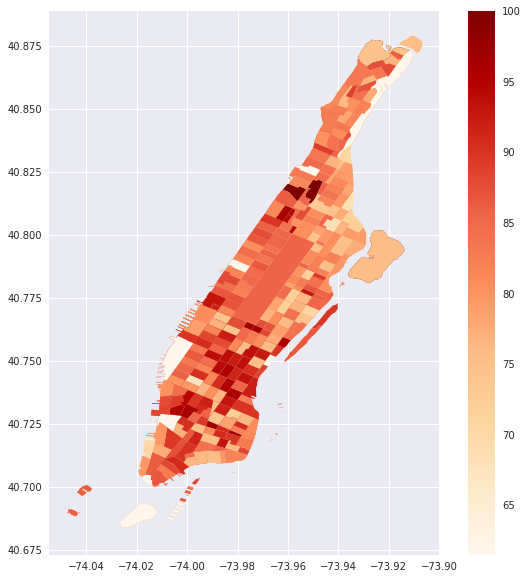

In [130]:
#these can only come when columns are converted from str to int for each income level
#ax=merged.loc[:,'Households; Estimate; $10,000 to $14,999'].plot( figsize=(10,10),  cmap='viridis', legend=True)
merged.plot(column='Percent; Estimate; SELECTED AGE CATEGORIES - 18 years and over', cmap='OrRd',legend=True,figsize=(10,10))
#merged.plot(column='Households; Estimate; $150,000 to $199,999', cmap='OrRd', legend=True, figsize=(10,10))

In [131]:
merged.columns

Index(['Percent; Estimate; AGE - Under 5 years',
       'Percent; Estimate; AGE - 5 to 9 years',
       'Percent; Estimate; AGE - 10 to 14 years',
       'Percent; Estimate; AGE - 15 to 19 years',
       'Percent; Estimate; AGE - 20 to 24 years',
       'Percent; Estimate; AGE - 25 to 29 years',
       'Percent; Estimate; AGE - 30 to 34 years',
       'Percent; Estimate; AGE - 35 to 39 years',
       'Percent; Estimate; AGE - 40 to 44 years',
       'Percent; Estimate; AGE - 45 to 49 years',
       'Percent; Estimate; AGE - 50 to 54 years',
       'Percent; Estimate; AGE - 55 to 59 years',
       'Percent; Estimate; AGE - 60 to 64 years',
       'Percent; Estimate; AGE - 65 to 69 years',
       'Percent; Estimate; AGE - 70 to 74 years',
       'Percent; Estimate; AGE - 75 to 79 years',
       'Percent; Estimate; AGE - 80 to 84 years',
       'Percent; Estimate; AGE - 85 years and over',
       'Percent; Estimate; SELECTED AGE CATEGORIES - 5 to 14 years',
       'Percent; Estimate; SELE

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


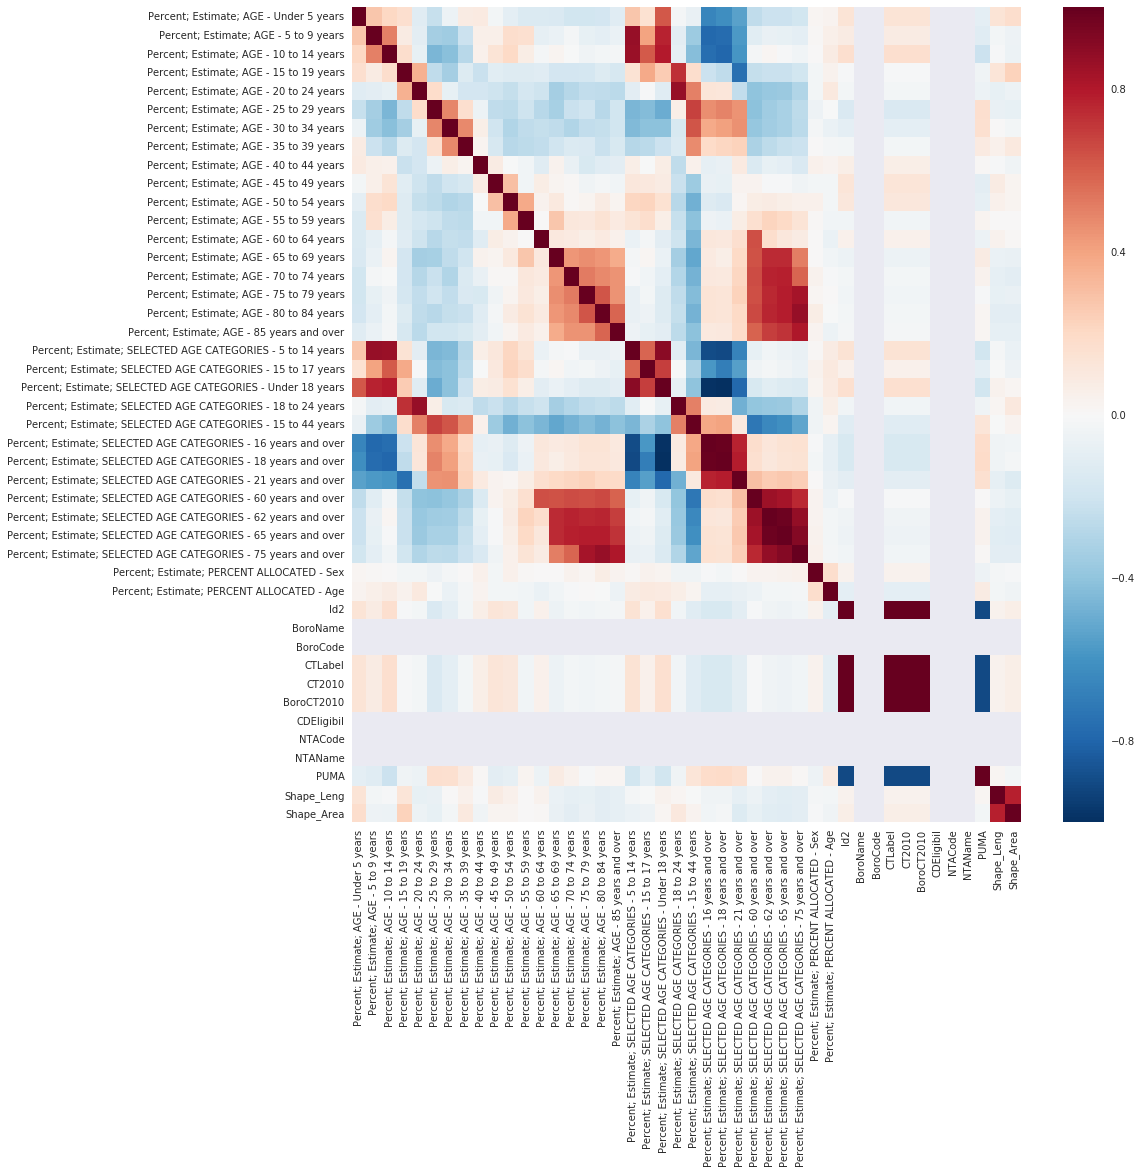

In [133]:
plt.figure(figsize=(15,15))
sns.heatmap(merged.corr(), annot=False)